In [9]:
using Plots
include("inversion_ext.jl")

split_u!

## Checking f_to_c

In [10]:
N=10
M=1
χ = [-1.0; -1.0; -5.0]
p = (χ, N, M)
u = zeros(N*M)
u0 = zeros(N*M)

con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]
con[1,:] = [0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818]

con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]
#con0[1,:] = [0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818]

println(u0)
println(u)
println(f_to_c!(u0,p) - u)
println(u0)

[0.0, 0.0, 0.0, 0.0, 0.0, -10.0, 0.2, 1.1, 1.5, 1.2]
[0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818, -10.0, 0.2, 1.1, 1.5, 1.2]
[0.0, -1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1366314976448222, 0.07009306769467442, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818, -10.0, 0.2, 1.1, 1.5, 1.2]


## Checking c_to_f!

In [11]:
tol = 10^(-16)
iter_max = 40
χ = [-1.0; -1.0; -5.0]
M=1
N=10
p = (χ, tol, iter_max, N, M)

u = zeros(N*M)
u0 = zeros(N*M)

con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]
con[1,:] = [0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818]

con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2] + 0.3 .*rand(N÷2)
con0[1,:] = [0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818]

5-element Vector{Float64}:
 0.1366314976448222
 0.07009306769467444
 0.06115332989597844
 0.07178418128379448
 0.04927907295689818

In [14]:
@time c_to_f!(u0, p)# - u

  0.000015 seconds (35 allocations: 2.156 KiB)


10-element Vector{Float64}:
   0.1366314976448222
   0.07009306769467444
   0.06115332989597844
   0.07178418128379448
   0.04927907295689818
 -10.000000000000004
   0.2000000000000002
   1.1000000000000005
   1.500000000000001
   1.1999999999999988

In [15]:
u0 - u

10-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
 -3.552713678800501e-15
  1.942890293094024e-16
  4.440892098500626e-16
  1.1102230246251565e-15
 -1.1102230246251565e-15

## Testing with Euler

In [21]:
N=10
M=1
χ = [-1.0; 0.0; -1.0] #put the interaction term to zero
p = (χ, N, M)
u = zeros(N*M)
u0 = zeros(N*M)


con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)
con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 0., 0., 0.]
flu[1,:] = [-10.0, 0.2, 0., 0., 0.]
#flu0[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]

println(f_to_c!(u0,p))

[0.06333333333333332, 0.016666666666666666, 0.0, 0.0, 0.0, -10.0, 0.2, 0.0, 0.0, 0.0]


In [22]:
#flu[1,1] = -flu[1,1]
con[1,:] = F(flu,con,χ)
#flu[1,1] = -flu[1,1];
u

10-element Vector{Float64}:
   0.06333333333333332
   0.016666666666666666
   0.0
   0.0
   0.0
 -10.0
   0.2
   0.0
   0.0
   0.0

In [23]:
con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 0,0,0]

println(u0)
println(u)
println(f_to_c!(u,p) - u)
println(u0)

[0.06333333333333332, 0.016666666666666666, 0.0, 0.0, 0.0, -10.0, 0.2, 0.0, 0.0, 0.0]
[0.06333333333333332, 0.016666666666666666, 0.0, 0.0, 0.0, -10.0, 0.2, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.06333333333333332, 0.016666666666666666, 0.0, 0.0, 0.0, -10.0, 0.2, 0.0, 0.0, 0.0]


In [24]:
@time c_to_f_direct!(u0,p) - u

  0.114335 seconds (276.56 k allocations: 16.863 MiB, 99.96% compilation time)


10-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.7763568394002505e-15
  0.0
  0.0
  0.0
  0.0

## Smoothness test

We want to test whether the inversion is or not too noisy.

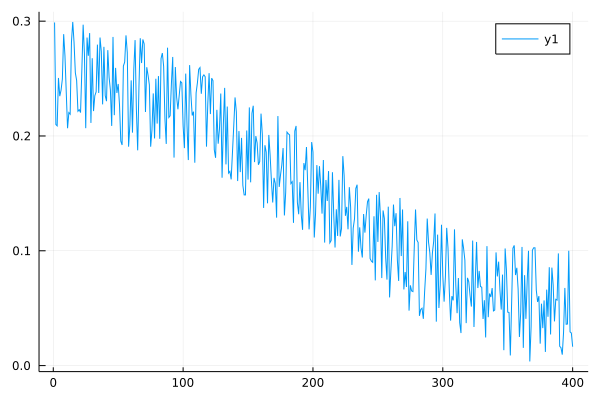

In [25]:
tol = 10^(-14)
iter_max = 100


N = 10
M = 400
u = zeros(N*M)

χ = [-1.0; -0.0; -1.0]
p_c_to_f = (χ, tol, iter_max, N, M)
p_f_to_c = (χ, N, M)
c = view(reshape(u,(M,N)),:,1:N÷2)
f = view(reshape(u,(M,N)),:,N÷2+1:N)

for j ∈ 1:M
    f[j,1] = -1.0 + 0.9* sin(π*j/(M+1))
    f[j,2] = 0.1 + 0.1* cos(π*j/(M+1))
end
 
f_to_c!(u,p_f_to_c)

plot(c[:,1])

up = zeros(N*M)
cp = view(reshape(up,(M,N)),:,1:N÷2)
fp = view(reshape(up,(M,N)),:,N÷2+1:N)

fp[:,1] = f[:,1] + 0.05 *rand(M);
fp[:,2] = f[:,2] + 0.1 *rand(M);
cp[:,1] = c[:,1]
cp[:,2] = c[:,2];

plot(fp[:,2])

In [26]:
maximum(abs, up)
reshape(up,M,N);

In [27]:
fp;

In [28]:
c_to_f!(up,p_c_to_f);
cf = view(reshape(up,(M,N)),:,1:N÷2)
ff = view(reshape(up,(M,N)),:,N÷2+1:N);

iter_max reached j = 153
iter_max reached j = 160
iter_max reached j = 161
iter_max reached j = 165
iter_max reached j = 179
iter_max reached j = 223
iter_max reached j = 236
iter_max reached j = 246


In [29]:
f-ff;

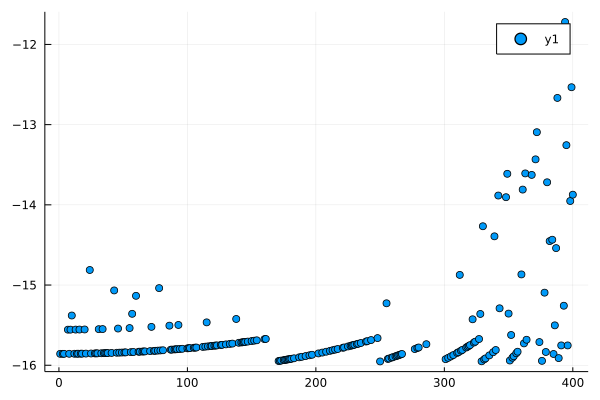

In [30]:
s=2
scatter(log10.(abs.(ff[:,s] - f[:,s])./abs.(f[:,s])))

In [ ]:
κ =  χ₀*μ^5/(15π*χ₁^2)

In [ ]:
λ = -χ₀μ^4/(π*χ₁^2)